In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
#Data cleaning
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
#transalting numerical values ot categorical
status_values = {
    1: 'ok',
    2: 'default',
    3: 'unk'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [5]:
# Dataset preparation
# Summery statistics for each column (numerical values only)
# missing values are encoded with a suspicious value 99999999 to we convert it to NAN
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
df.describe().round() #to the nearst integer

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [6]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

train auc 0.7017132266649385
val auc 0.6876073869887143
   1 -> 0.613
   2 -> 0.688
   3 -> 0.763
   4 -> 0.779
   5 -> 0.784
   6 -> 0.777
  10 -> 0.712
  15 -> 0.672
  20 -> 0.669
None -> 0.674
depth: 4
1 -> 0.779
5 -> 0.779
10 -> 0.774
15 -> 0.771
20 -> 0.784
50 -> 0.778
100 -> 0.767
200 -> 0.765

depth: 5
1 -> 0.783
5 -> 0.787
10 -> 0.783
15 -> 0.780
20 -> 0.785
50 -> 0.789
100 -> 0.786
200 -> 0.778

depth: 6
1 -> 0.774
5 -> 0.785
10 -> 0.792
15 -> 0.795
20 -> 0.800
50 -> 0.793
100 -> 0.793
200 -> 0.789

train auc 0.8429263976804766
val auc 0.7990426334070879
10 -> 0.802
20 -> 0.826
30 -> 0.826
40 -> 0.827
50 -> 0.832
60 -> 0.832
70 -> 0.830
80 -> 0.832
90 -> 0.832
100 -> 0.829
110 -> 0.830
120 -> 0.831
130 -> 0.832
140 -> 0.833
150 -> 0.834
160 -> 0.834
170 -> 0.833
180 -> 0.833
190 -> 0.834
200 -> 0.834
depth: 5
10 -> 0.817
20 -> 0.822
30 -> 0.822
40 -> 0.825
50 -> 0.829
60 -> 0.831
70 -> 0.832
80 -> 0.831
90 -> 0.831
100 -> 0.831
110 -> 0.831
120 -> 0.830
130 -> 0.830
140 -> 0.8

0.8438721476469956

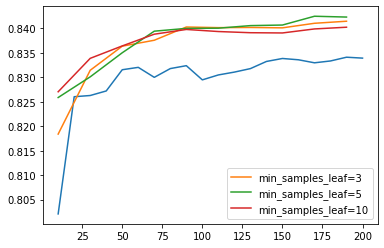

In [25]:
#1- Dataset preparation
#spliting dataset using scikit-learn
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

# checking sizes of our splited data
len(df_train), len(df_val), len(df_test)

#catching our target variables(status)
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

#delete target variable from the training and validation sets
del df_train['status']
del df_val['status']

# replace missing values(NAN that we add before for missing values) with zero
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

# convert dataframe to a list of dictionaries to be able to pass them to DictVectorizer to apply one-hot encoding.
dict_train = df_train.to_dict('records')
dict_val = df_val.to_dict('records')

# applying one-hot encoding
dv = DictVectorizer(sparse=False)

x_train = dv.fit_transform(dict_train)
x_val = dv.transform(dict_val)

# 2- training model (Decision Tree: is a set of if-else statement)
dt = DecisionTreeClassifier(max_depth=2) #by limiting the tree depth, we make our model be able to more generalize.
dt.fit(x_train, y_train)

# 3- evaluating performance of the model (using AUC)

#we need scores(probability) , not hard predictions.
# we have overfitting for the validation set, so we need to make the model less powerful
# to improve the model's ability to generalize 
y_pred = dt.predict_proba(x_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

y_pred = dt.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val auc', auc)


# To visualize the tree we just learned
# tree_text = export_text(dt, feature_names=dv.feature_names_)
# print(tree_text)

# measuring the degree of impurity, using misclassification rate(how many observations in a group don't belong to the majority class).
#how decision tree algorithm work:
# spliting data related to specific feature and try all thresholds to find the one with the least impurties 
# when splitting the data, until there is no impurties found it stops (read more on stopping criteria)

# 4- parameter tuning for decision tree (the most important are => max_depth and min_leaf_size)
# getting the best depth values for the decision tree, which is (4,5,6)
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train, y_train)
    y_pred = dt.predict_proba(x_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

# getting the best min_sample_leaf value for our decision tree
for m in [4, 5, 6]:
    print('depth: %s' % m)
    
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(x_train, y_train)
        y_pred = dt.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

# best parameters are max_depth = 6 and min_sample_leaf=20 (the value we use for min_leaf_size influences the best value of max_depth.)
# 5- train model on the tunned parameters
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20) 
dt.fit(x_train, y_train)

# using the tunned parameters on training dataset we get 84% accuracy, which is better than 70%
y_pred = dt.predict_proba(x_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

# using the tunned paramters on validation dataset we get 80% accuracy, which is better than 68%
y_pred = dt.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val auc', auc)

# 6- Random forest (ensemble learning = combineing multiple decision trees together to make the model achieve better predictive performance)

# For this to work, the models need to be different. If we train the same decision tree model
# ten times, they will all predict the same output, so it’s not useful at all.

# The easiest way to have different models is to train each tree on a different subset of features.

#To train random forest, we can do this:
# Train N independent decision tree models.80
# For each model, select a random subset of features, and use only them for training.
# When predicting, combine the output of N models into one.

rf = RandomForestClassifier(n_estimators=10, random_state=3) # n_estimators means the number of decision trees in the random forest
rf.fit(x_train, y_train)

y_pred = rf.predict_proba(x_val)[:, 1]
roc_auc_score(y_val, y_pred)

#iterating over the best possible value of number of decision trees(n_estimators) related to the randomForest
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3) 
    rf.fit(x_train, y_train)
    
    y_pred = rf.predict_proba(x_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    
    aucs.append(auc)

plt.plot(range(10, 201, 10), aucs)

# 7- parameter tuning for random forst
# iterating over the best value for decision tree depth
all_aucs = {} 

for depth in [5, 10, 20]: 
    print('depth: %s' % depth)
    aucs = [] 

    for i in range(10, 201, 10): 
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1) 
        rf.fit(x_train, y_train)
        y_pred = rf.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred) 
        print('%s -> %.3f' % (i, auc)) 
        aucs.append(auc) 

    all_aucs[depth] = aucs 
    print()
    
#plotting aucs related to max_depth of the decision trees values, which is (10)
# num_trees = list(range(10, 201, 10))
# plt.plot(num_trees, all_aucs[5], label='depth=5')
# plt.plot(num_trees, all_aucs[10], color="green",label='depth=10')
# plt.plot(num_trees, all_aucs[20], label='depth=20')
# plt.legend()

# iterating over the best value for min_sample_leaf based on the max depth(10) we get in the last step
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(x_train, y_train)
        y_pred = rf.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
        
    all_aucs[m] = aucs
    print()
    
#min_sample_leaf is (5) with max depth 0f (10)
num_trees = list(range(10, 201, 20))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.legend()

# 8- training the final model of random forest on the tuned parameters
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(x_train, y_train)

# we get 94% on training set, which is better than 84% on a single decision tree
y_pred = rf.predict_proba(x_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

# we get 84% on validation set, which is better than 80% on a single decision tree
y_pred = rf.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val auc', auc)


# 9- using another approach ot train our model(XGBoost)
# Gradient boosting: we can train models sequentially, as each next model tries to fix errors from the previous one (Using another approach to traing our model)
#there are many good implementations of the gradient boosting model from scikit-learn, as XGBoost, LightGBM and CatBoost
# the most popular one is "XGBoost"(Extreme Gradient Boosting)

#putting training and validation set in a DMatrix to be able to use XGBoost on the sets.
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(x_val, label=y_val, feature_names=dv.feature_names_)

# specificying xgboost default parameters for training
xgb_params = {
    'eta': 0.05, # learning rate (determines the weight of the correction)
    'max_depth': 3, #tree depth
    'min_child_weight': 50, #equal to min_samples_leaf(The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf)
    'objective': 'binary:logistic', # type of our model which is binary classification
    'eval_metric': 'auc', # evaluation metric
    'nthread': 4, #set it to the number of cores your computer has.
    'seed': 1, #to make result repreduciable
    'silent': 1 # the verbosity of the output, when set to "1", it'll output only warnings
}

# monitoring model performance (watchlist)
# training an XGBoost model is simpler when we can see how it's performance changes when the number of trees grows.
watchlist = [(dtrain, 'train'), (dval, 'val')]

# our model has the effect of over fitting: it becomes more and more complex until it simply memorizes the entire training set
# on the validation set it improves then it declines due to overfitting.
model = xgb.train(xgb_params, dtrain, num_boost_round=500, #increase the number of trees if the "eta" is small
                 evals=watchlist, verbose_eval=10) #num_boost_round is the number of trees, verbose_eval is the number we jump with
#get predictions of the validation set
y_pred = model.predict(dval)
y_pred[:10]

#evaluate accuracy of XGBoost on validation set, which is 82% that is lower than our prediction using random forest 84%
#after tunning the parameters(max_depth=3, min_child_weight=50): we get 84.7% on validation set
#When eta is 0.05 , AUC grows slower, but peaks at a higher value. For a smaller learning
#rate, it takes more trees to reach the peak, but we could achieve better performance.
roc_auc_score(y_val, y_pred)

#we get 84.7% after tuning parameters using XGBoost, which is 0.7% better than random forest.

#10- Testing the final model
#we will use the validation data as a part of the training data as we get our purpose from it, by tunning our parameters well.
#create the traget variable
y_train = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

#remove target variable
del df_train_full['status']
del df_test['status']

#we convert dataframes into lists of dictionaries, and then use one-hot encoding to get the feature matrices.
dict_train = df_train_full.fillna(0).to_dict('records')
dict_test = df_test.fillna(0).to_dict('records')
dv = DictVectorizer(sparse=False)
x_train = dv.fit_transform(dict_train)
x_test = dv.transform(dict_test)

#Finally, train the XGBoost model using this data and the optimal parameters we determined previously.
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(x_test, label=y_test, feature_names=dv.feature_names_)

num_trees = 270

model = xgb.train(xgb_params, dtrain, num_boost_round=num_trees)

#evaluating the performance of the test set
y_pred_xgb = model.predict(dtest)
roc_auc_score(y_test, y_pred_xgb)
# it gives 84.3% which is better than the validation of the random forest with 0.3%